# Word2Vec

[other tut](https://rare-technologies.com/word2vec-tutorial/#app)
start w/ pretrained model

In [3]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


[if you need to process unknown words to the model, use FastText ]

# Methods

```python
wv.similarity(w1,w2)
wv.most_similar(positive=[w1,w2...wn], topn=5)
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']
```

## Training Your Own Model

In [5]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """iterator to yield over sentences (lists of str)"""
    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            yield utils.simple_preprocess(line)
            
import gensim.models
sents = MyCorpus()
model = gensim.models.Word2Vec(sentences=sents)


save model
```python
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    #
    # The model is now safely stored in the filepath.
    # You can copy it to other machines, share it with others, etc.
    #
    # To load a saved model:
    #
    new_model = gensim.models.Word2Vec.load(temporary_filepath)
```

Train params

- min_count: remove anything under this count
- vector_size: default 100
- workers (needs Cython)

Evaluation

e.g., `bad:worse;good:?`

with google:

```python
model.wv.evaluate_word_analogies(datapath('questions-words.txt'))
>>
```
```
(0.0,
 [{'section': 'capital-common-countries',
   'correct': [],
   'incorrect': [('CANBERRA', 'AUSTRALIA', 'KABUL', 'AFGHANISTAN'),
    ('CANBERRA', 'AUSTRALIA', 'PARIS', 'FRANCE'),
    ('KABUL', 'AFGHANISTAN', 'PARIS', 'FRANCE'),
    ('KABUL', 'AFGHANISTAN', 'CANBERRA', 'AUSTRALIA'),
    ('PARIS', 'FRANCE', 'CANBERRA', 'AUSTRALIA'),
    ('PARIS', 'FRANCE', 'KABUL', 'AFGHANISTAN')]},
  {'section': 'capital-world',
   'correct': [],
   'incorrect': [('CANBERRA', 'AUSTRALIA', 'KABUL', 'AFGHANISTAN'),
    ('KABUL', 'AFGHANISTAN', 'PARIS', 'FRANCE')]},
  {'section': 'currency', 'correct': [], 'incorrect': []},
  {'section': 'city-in-state', 'correct': [], 'incorrect': []},
  {'section': 'family',
   'correct': [],
   'incorrect': [('HE', 'SHE', 'HIS', 'HER'),
    ('HE', 'SHE', 'MAN', 'WOMAN'),
```

with academic set (preferred?)

model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

[tut on classifier pipeline](https://github.com/RaRe-Technologies/movie-plots-by-genre)

#### see training loss with `get_latest_training_loss `

## dim reduc

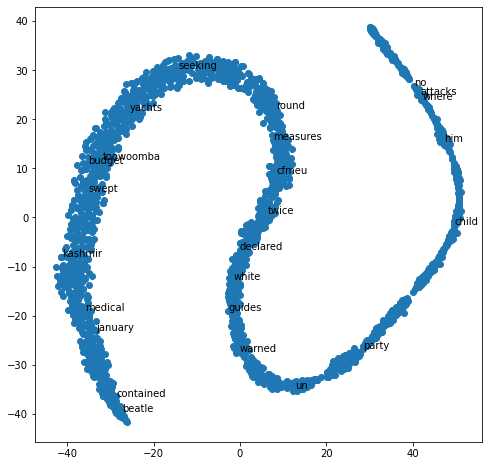

In [17]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

def reduce_dimensions(model):
    num_dimensions = 2
    vectors  = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    #tsne
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vecs = tsne.fit_transform(vectors)
    xs, ys = vecs[:,0], vecs[:,1]
    return xs, ys, labels

x, y, labels = reduce_dimensions(model)
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x,y)
indices = list(range(len(labels)))
sample = random.sample(indices, 25)
for i in sample:
    plt.annotate(labels[i], (x[i], y[i]))